In [7]:
import pandas as pd
df = pd.read_csv("pokemon.csv")
df

,name,type1,type2,weight_kg,hp,attack,defense,speed,generation,is_legendary
0,Bulbasaur,grass,poison,6.9,45,49,49,45,1,0
1,Ivysaur,grass,poison,13.0,60,62,63,60,1,0
2,Venusaur,grass,poison,100.0,80,100,123,80,1,0
3,Charmander,fire,NaN,8.5,39,52,43,65,1,0
4,Charmeleon,fire,NaN,19.0,58,64,58,80,1,0
...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,steel,flying,999.9,97,101,103,61,7,1
797,Kartana,grass,steel,0.1,59,181,131,109,7,1
798,Guzzlord,dark,dragon,888.0,223,101,53,43,7,1
799,Necrozma,psychic,NaN,230.0,97,107,101,79,7,1


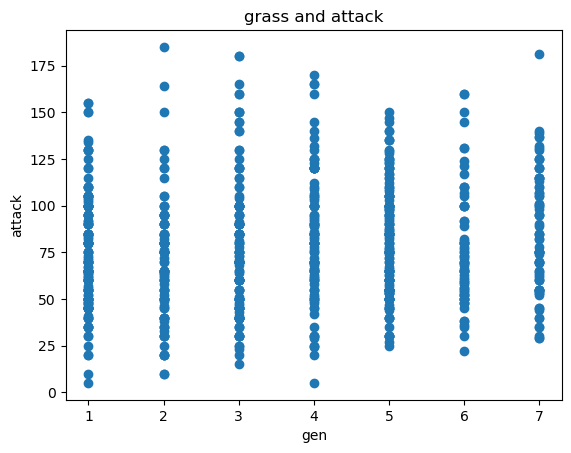

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df.generation, df.attack)
plt.title('grass and attack')
plt.xlabel('gen')
plt.ylabel('attack')
plt.show() ##this removes the text when creating the plot

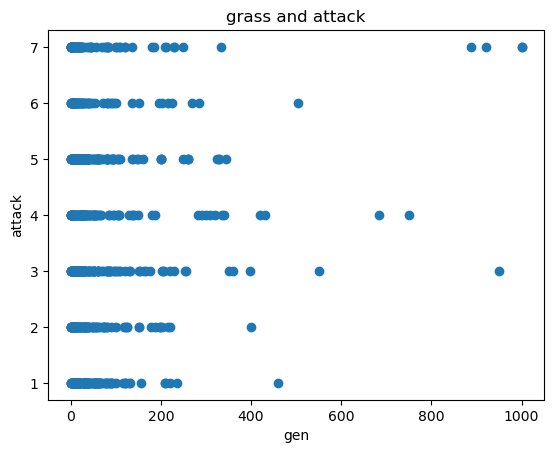

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df.weight_kg, df.generation)
plt.title('grass and attack')
plt.xlabel('gen')
plt.ylabel('attack')
plt.show() ##this removes the text when creating the plot

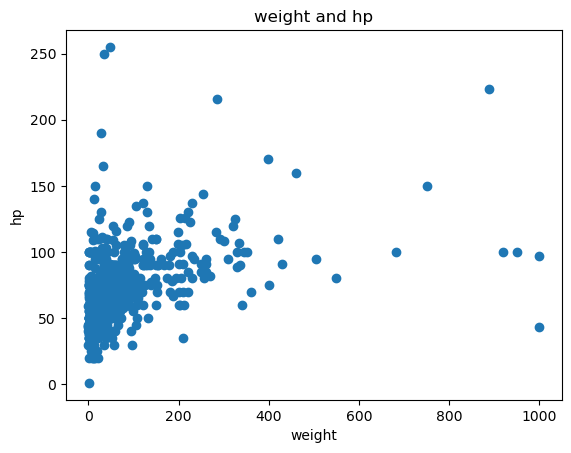

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df.weight_kg, df.hp)
plt.title('weight and hp')
plt.xlabel('weight')
plt.ylabel('hp')
plt.show() ##this removes the text when creating the plot

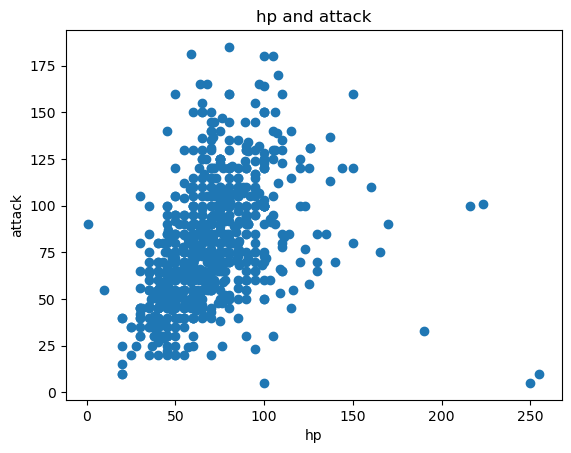

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df.hp, df.attack)
plt.title('hp and attack')
plt.xlabel('hp')
plt.ylabel('attack')
plt.show() ##this removes the text when creating the plot

In [12]:
df['type1'].value_counts()



type1
water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: count, dtype: int64

In [13]:
df['type2'].value_counts()


type2
flying      95
poison      34
ground      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: count, dtype: int64

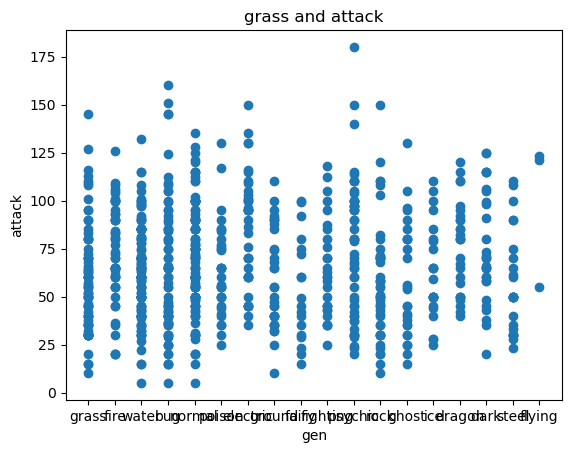

In [14]:
import matplotlib.pyplot as plt
plt.scatter(df.type1, df.speed)
plt.title('grass and attack')
plt.xlabel('gen')
plt.ylabel('attack')
plt.show() ##this removes the text when creating the plot

In [15]:
import numpy as np

df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()

#95% P <= 0.05 - MAGIC NUMBER!!!
##lESS THAN 0.05 go with the alternative

##value of 0.02, values are correlated (alternative hypothesis)
#everytest will go to a P-value

##TLDR - LESS THAN 0.05, CORRELATION | OVER, NO CORRELATION.
##0.05 < P < 0.10 - if it is between those 2 numbers, they aren't significant - keep it in the back burner 
## if we are looking for what is correlated, we can say they might be correlated, but keep it in the back pocket

##two things to remember | P <= 0.05 | and what you are testing for


,weight_kg,hp,attack,defense,speed,generation,is_legendary
weight_kg,1.000000,0.427743,0.382183,0.424067,0.051384,0.085767,0.393023
hp,0.427743,1.000000,0.410616,0.242378,0.160760,0.074065,0.308405
attack,0.382183,0.410616,1.000000,0.468915,0.352703,0.101375,0.303295
defense,0.424067,0.242378,0.468915,1.000000,0.007934,0.057603,0.265587
speed,0.051384,0.160760,0.352703,0.007934,1.000000,-0.019914,0.311639
generation,0.085767,0.074065,0.101375,0.057603,-0.019914,1.000000,0.139029
is_legendary,0.393023,0.308405,0.303295,0.265587,0.311639,0.139029,1.000000


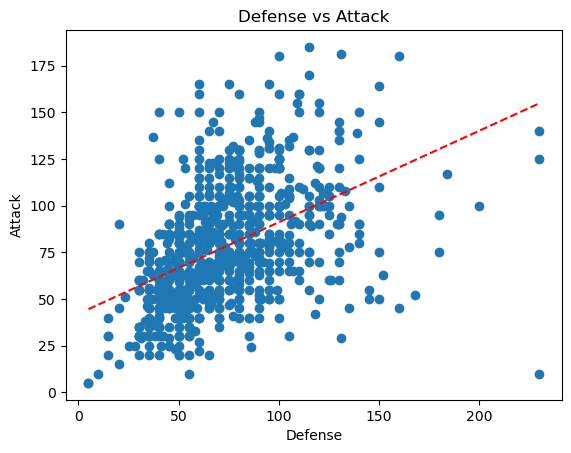

Slope (m): 0.49009302467200416
Intercept (b): 42.07660414129986
Correlation coefficient (r): 0.46891491391893025
P-value (p): 4.9630872639068714e-45
Standard error (err): 0.032658140940685594


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Scatter plot for defense and attack
plt.scatter(df['defense'], df['attack'])
plt.title('Defense vs Attack')  # Adjusted to fit the data
plt.xlabel('Defense')
plt.ylabel('Attack')

# Perform linear regression
m, b, r, p, err = stats.linregress(df['defense'], df['attack'])

# Save the defense and attack columns to variables
Defense = df['defense']
Attack = df['attack']

# Get the minimum and maximum values for the defense column
numMAX = Defense.max()
numMIN = Defense.min()

# Generate x values for the regression line within the range of defense values
xAXIS = np.linspace(numMIN, numMAX, 100)

# Plot the regression line
plt.plot(xAXIS, m * xAXIS + b, "r--")
plt.show()

# Print out the linear regression stats
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")
print(f"Correlation coefficient (r): {r}")
print(f"P-value (p): {p}")
print(f"Standard error (err): {err}")


In [23]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# This is a different way of calculating our regression model
# This has all sorts of stats included, like RESIDUALS, which we will use in our tests below
model = ols(formula='defense~attack', data=df).fit()

# We saved the linear regression model as 'model'
# One of our options to view are the parameters, using the following code
model.params

Intercept    38.077739
attack        0.448652
dtype: float64

In [21]:
# Use the above 'model', but the residuals, etc., and plug-and-chug
white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

# Round to 5 decimal places
output_df.round(5)

,LM stat,LM p-value,F-stat,F p-value
White,82.56424,0.0,45.85397,0.0
Breusch-Pagan,50.98685,0.0,54.31703,0.0


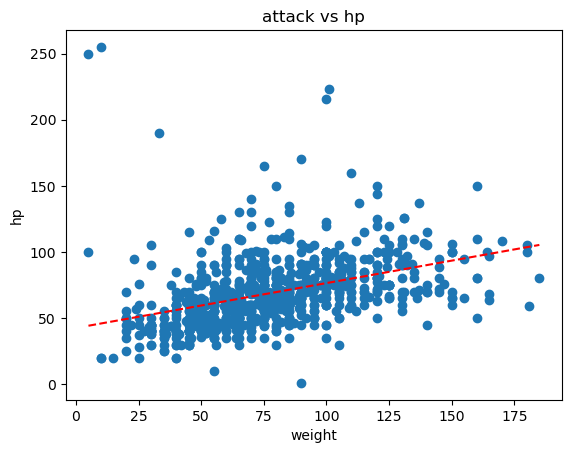

Slope (m): 0.33933244813002106
Intercept (b): 42.53916504971207
Correlation coefficient (r): 0.4106157893065069
P-value (p): 6.272677191271402e-34
Standard error (err): 0.026657534162102394


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Scatter plot for defense and attack
plt.scatter(df['attack'], df['hp'])
plt.title('attack vs hp')  # Adjusted to fit the data
plt.xlabel('weight')
plt.ylabel('hp')

# Perform linear regression
m, b, r, p, err = stats.linregress(df['attack'], df['hp'])

# Save the defense and attack columns to variables
Defense = df['attack']
Attack = df['hp']

# Get the minimum and maximum values for the defense column
numMAX = Defense.max()
numMIN = Defense.min()

# Generate x values for the regression line within the range of defense values
xAXIS = np.linspace(numMIN, numMAX, 100)

# Plot the regression line
plt.plot(xAXIS, m * xAXIS + b, "r--")
plt.show()

# Print out the linear regression stats
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")
print(f"Correlation coefficient (r): {r}")
print(f"P-value (p): {p}")
print(f"Standard error (err): {err}")


In [34]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# This is a different way of calculating our regression model
# This has all sorts of stats included, like RESIDUALS, which we will use in our tests below
model = ols(formula='attack~hp', data=df).fit()

# We saved the linear regression model as 'model'
# One of our options to view are the parameters, using the following code
model.params

Intercept    43.593872
hp            0.496874
dtype: float64

In [35]:
# Use the above 'model', but the residuals, etc., and plug-and-chug
white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test

# Round to 5 decimal places
output_df.round(5)

,LM stat,LM p-value,F-stat,F p-value
White,279.17193,0.0,213.46035,0.0
Breusch-Pagan,109.85725,0.0,127.00117,0.0
